### blank

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

file_path = 'C:/Users/Hector/Desktop/Coding Exercises/GetPaid/getpaid_raw.xlsx'
data = pd.read_excel(file_path)

In [3]:
count_by_country = data.groupby('currency').count()

count_by_country.head()

,transaction_id,createdAt,employee_id,fulFillmentDate,company_name,company_id,grossAmount,serviceFee,Note
currency,,,,,,,,,
IDR,6876,6876,6876,6876,6876,6876,6876,6876,6
PHP,26,26,26,26,26,26,26,26,0
SGD,936,936,936,936,936,936,936,936,227
VND,9,9,9,9,9,9,9,9,0


In [4]:
total_transaction = count_by_country['transaction_id'].sum()

count_by_country['%'] = ((count_by_country['transaction_id'] / total_transaction ) *100).round(2)

In [41]:
count_by_country.head()

,transaction_id,createdAt,employee_id,fulFillmentDate,company_name,company_id,grossAmount,serviceFee,Note,%
currency,,,,,,,,,,
IDR,6876,6876,6876,6876,6876,6876,6876,6876,6,87.63
PHP,26,26,26,26,26,26,26,26,0,0.33
SGD,936,936,936,936,936,936,936,936,227,11.93
VND,9,9,9,9,9,9,9,9,0,0.11


In [5]:
filterIDR = ['IDR']
filterSGD = ['SGD']

data_ID = data[data['currency'].isin(filterIDR)]
data_SGD = data[data['currency'].isin(filterSGD)]

In [29]:
data_SGD.head()
# data_ID.info()

,transaction_id,createdAt,employee_id,fulFillmentDate,company_name,company_id,currency,grossAmount,serviceFee,Note
0,ckpq93l03005112l6g4vzkev4,2021-06-10 01:57:24.627,ckppi3j4x003914l23yox67sy,2021-06-10 03:13:35.865,WageSage Pte Ltd,ckb4nf6u00000holx5o909ups,SGD,500.0,0.00,NaN
1,ckpsjir8600631gmgopg9ercx,2021-06-11 16:24:41.046,ckppi3j4x003914l23yox67sy,2021-06-12 01:57:35.865,WageSage Pte Ltd,ckb4nf6u00000holx5o909ups,SGD,500.0,0.00,NaN
2,ckpw0t2hz005514mgsy0md7vy,2021-06-14 02:51:54.215,ckowv1z4g004115iccfo1i43f,2021-06-12 04:00:35.865,Crowd Pte Ltd,cko1bvypi000001l2bkxvghmc,SGD,600.0,18.00,EWA+
4,ckr4nsr6r01211gl13okyixp8,2021-07-15 08:37:22.467,ckr4ivm6e003313l2uqoalwxm,2021-08-17 09:45:52.039,PG Wealth Builder,ckr4ii71s000001mof6fu2s81,SGD,15000.0,450.00,NaN
6,ckr5z5clj007313jhyxfgn2m6,2021-07-16 06:42:52.039,ckowv1z4g004115iccfo1i43f,2021-07-16 10:00:52.039,Crowd Pte Ltd,cko1bvypi000001l2bkxvghmc,SGD,1745.0,52.35,EWA+


In [6]:
data_SGD['cr8date'] = pd.to_datetime(data_SGD['createdAt'])
data_SGD['fulfildate'] = pd.to_datetime(data_SGD['fulFillmentDate'])
data_SGD.reset_index()
data_SGD.shape

C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\3942112356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SGD['cr8date'] = pd.to_datetime(data_SGD['createdAt'])
C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\3942112356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SGD['fulfildate'] = pd.to_datetime(data_SGD['fulFillmentDate'])


(936, 12)

In [7]:
data_SGD['cr8mth'] = data_SGD['cr8date'].dt.month
data_SGD['cr8day'] = data_SGD['cr8date'].dt.day
data_SGD['cr8year'] = data_SGD['cr8date'].dt.year
# Now, create the new 'month_year' column formatted as "Month, Year".
data_SGD['cr8_mth_year'] = data_SGD['cr8date'].dt.strftime('%B, %Y')

# Display the first few rows to verify the new column.

data_SGD['cre8_date_day_mth_yr'] = data_SGD['cr8date'].dt.strftime('%d, %B, %Y')

# Print the DataFrame to see the new column.
print(data_SGD[['cr8date', 'cre8_date_day_mth_yr']].head())
print(data_SGD[['cr8date', 'cr8_mth_year']].head())

                  cr8date cre8_date_day_mth_yr
0 2021-06-10 01:57:24.627       10, June, 2021
1 2021-06-11 16:24:41.046       11, June, 2021
2 2021-06-14 02:51:54.215       14, June, 2021
4 2021-07-15 08:37:22.467       15, July, 2021
6 2021-07-16 06:42:52.039       16, July, 2021
                  cr8date cr8_mth_year
0 2021-06-10 01:57:24.627   June, 2021
1 2021-06-11 16:24:41.046   June, 2021
2 2021-06-14 02:51:54.215   June, 2021
4 2021-07-15 08:37:22.467   July, 2021
6 2021-07-16 06:42:52.039   July, 2021


C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\1055253236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SGD['cr8mth'] = data_SGD['cr8date'].dt.month
C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\1055253236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SGD['cr8day'] = data_SGD['cr8date'].dt.day
C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\1055253236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [8]:
# data_SGD.info()
data_SGD['day_of_week'] = data_SGD['cr8date'].dt.day_name()

data_SGD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_id        936 non-null    object        
 1   createdAt             936 non-null    datetime64[ns]
 2   employee_id           936 non-null    object        
 3   fulFillmentDate       936 non-null    datetime64[ns]
 4   company_name          936 non-null    object        
 5   company_id            936 non-null    object        
 6   currency              936 non-null    object        
 7   grossAmount           936 non-null    float64       
 8   serviceFee            936 non-null    float64       
 9   Note                  227 non-null    object        
 10  cr8date               936 non-null    datetime64[ns]
 11  fulfildate            936 non-null    datetime64[ns]
 12  cr8mth                936 non-null    int32         
 13  cr8day                93

C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\4012720600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SGD['day_of_week'] = data_SGD['cr8date'].dt.day_name()


In [9]:
import plotly.express as px
import pandas as pd

# Assuming data_SGD is your DataFrame as shown in the screenshot.

# Ensure 'cre8_date_day_mth_yr' is a datetime type for proper sorting
data_SGD['cre8_date_day_mth_yr'] = pd.to_datetime(data_SGD['cr8date']).dt.strftime('%d, %B, %Y')

# Group by 'cre8_date_day_mth_yr' and count the occurrences of 'transaction_id'
frequency = data_SGD.groupby('cre8_date_day_mth_yr')['transaction_id'].count().reset_index(name='count')

# Convert 'cre8_date_day_mth_yr' back to datetime for sorting
frequency['cre8_date_day_mth_yr'] = pd.to_datetime(frequency['cre8_date_day_mth_yr'])

# Sort the 'frequency' DataFrame by 'cre8_date_day_mth_yr' to ensure the x-axis is in ascending order
frequency = frequency.sort_values('cre8_date_day_mth_yr')

# Convert 'cre8_date_day_mth_yr' back to string for plotting
frequency['cre8_date_day_mth_yr'] = frequency['cre8_date_day_mth_yr'].dt.strftime('%d, %B, %Y')

# Merge to include 'cr8year' for coloring
frequency = frequency.merge(data_SGD[['cre8_date_day_mth_yr', 'cr8year']].drop_duplicates(), on='cre8_date_day_mth_yr')

# Define your color palette


color_continuous_scale = ['brown', 'blue', 'teal']


# Create an interactive time series plot with Plotly
fig = px.bar(frequency, x='cre8_date_day_mth_yr', y='count', color='cr8year',
              labels={'count': 'Frequency', 'cre8_date_day_mth_yr': 'Date'},
              title='Time Series Plot of Transaction Frequency Counts by Day for Each Year',
              color_continuous_scale=color_continuous_scale)  # Set the color palette here

# Improve hover data
fig.update_traces(hoverinfo='all')
fig.update_layout(
    height=500,  # Set the height of the figure in pixels
    width=1500    # Set the width of the figure in pixels
)


# Show the figure
fig.show()



C:\Users\Hector\AppData\Local\Temp\ipykernel_3612\788719624.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SGD['cre8_date_day_mth_yr'] = pd.to_datetime(data_SGD['cr8date']).dt.strftime('%d, %B, %Y')


In [10]:
import plotly.express as px

# Assuming data_SGD is your DataFrame as shown in the screenshot.
# Group by 'cr8_mth_year' and count the occurrences of 'transaction_id'
frequency = data_SGD.groupby('cr8_mth_year')['transaction_id'].count().reset_index(name='count')

# Merge to include 'cr8year' for coloring
frequency = frequency.merge(data_SGD[['cr8_mth_year', 'cr8year']].drop_duplicates(), on='cr8_mth_year')

# Sort the 'frequency' DataFrame by 'cr8_mth_year' to ensure the x-axis is in ascending order
frequency['cr8_mth_year'] = pd.to_datetime(frequency['cr8_mth_year'], format='%B, %Y')
frequency = frequency.sort_values('cr8_mth_year')

# Convert 'cr8_mth_year' back to a string for plotting
frequency['cr8_mth_year'] = frequency['cr8_mth_year'].dt.strftime('%B, %Y')

# Define your color palette
color_palette = ['grey', 'teal', 'red']

# Create an interactive time series plot with Plotly
fig = px.bar(frequency, x='cr8_mth_year', y='count', color='cr8year',
              labels={'count': 'Frequency', 'cr8_mth_year': 'Month-Year'},
              title='Time Series Plot of Transaction Frequency Counts by Month for Each Year',
              color_discrete_sequence=color_palette)  # Set the color palette here

# Improve hover data
fig.update_traces(hoverinfo='all')

# Show the figure
fig.show()

In [12]:
# transactions by company in SG - 14

data_SGD.groupby('company_id').count()

,transaction_id,createdAt,employee_id,fulFillmentDate,company_name,currency,grossAmount,serviceFee,Note,cr8date,fulfildate,cr8mth,cr8day,cr8year,cr8_mth_year,cre8_date_day_mth_yr,day_of_week
company_id,,,,,,,,,,,,,,,,,
ckb4nf6u00000holx5o909ups,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2
cko1bvypi000001l2bkxvghmc,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
ckr4ii71s000001mof6fu2s81,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3
ckrtwgzx9000008ms1o6s3k7m,183,183,183,183,183,183,183,183,0,183,183,183,183,183,183,183,183
cl1d5wqq9000009mh2auw6fby,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
cl25kzmd7000009lj01e31i1c,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8,8,8
cl6a4srxz000009lacloqfnoe,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10
cl6byhfmq000009l92ntv09xc,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
clb4pg96j000008mp3408cigz,248,248,248,248,248,248,248,248,0,248,248,248,248,248,248,248,248


In [11]:
# transactions by year by company
import pandas as pd

# Create a pivot table with 'company_id' as rows, 'cr8year' as columns, and count the occurrences for values.
cross_table = pd.pivot_table(data_SGD, values='transaction_id', index='company_id', 
                             columns='cr8year', aggfunc='count', fill_value=0)

# Display the cross table
cross_table.shape
print(cross_table)

cr8year                    2021  2022  2023
company_id                                 
ckb4nf6u00000holx5o909ups     2     0     0
cko1bvypi000001l2bkxvghmc    12    27     0
ckr4ii71s000001mof6fu2s81     3     0     0
ckrtwgzx9000008ms1o6s3k7m    19   109    55
cl1d5wqq9000009mh2auw6fby     0   171     0
cl25kzmd7000009lj01e31i1c     0     7     1
cl6a4srxz000009lacloqfnoe     0    10     0
cl6byhfmq000009l92ntv09xc     0    15     2
clb4pg96j000008mp3408cigz     0     0   248
cldl17w2k000008lf4s660jbs     0     0    96
clexvu3xu000008kzbi1ugb54     0     0   132
clf1wrct2000008jt2p3vcaf6     0     0     1
clh5nf46p000008jogr8d92eb     0     0     1
clhe7k1z6000008mjevu1hx1u     0     0    25


In [12]:
# transactions by year by individuals - 115 individuals

data_SGD.groupby('employee_id').count()

,transaction_id,createdAt,fulFillmentDate,company_name,company_id,currency,grossAmount,serviceFee,Note,cr8date,fulfildate,cr8mth,cr8day,cr8year,cr8_mth_year,cre8_date_day_mth_yr
employee_id,,,,,,,,,,,,,,,,
ckowv1z4g004115iccfo1i43f,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
ckowv357l006915icfplo2v1a,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
ckppi3j4x003914l23yox67sy,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
ckr4ivm6e003313l2uqoalwxm,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3
cksq1tv42003815kz97py399n,83,83,83,83,83,83,83,83,0,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
clht4vdyo063608l1anryd7cx,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3
clhu4rlfv003508mj40bsr4o5,30,30,30,30,30,30,30,30,0,30,30,30,30,30,30,30
clhvks492022408mcnblh4f3z,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


In [13]:
# transactions by year by individual

import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Create a pivot table with 'company_id' as rows, 'cr8year' as columns, and count the occurrences for values.
cross_table = pd.pivot_table(data_SGD, values='transaction_id', index='employee_id', 
                             columns='cr8year', aggfunc='count', fill_value=0)

# Display the cross table
print(cross_table)

# Reset the option to avoid affecting the global environment (optional)
pd.reset_option('display.max_rows')


cr8year                    2021  2022  2023
employee_id                                
ckowv1z4g004115iccfo1i43f    12    17     0
ckowv357l006915icfplo2v1a     0    10     0
ckppi3j4x003914l23yox67sy     2     0     0
ckr4ivm6e003313l2uqoalwxm     3     0     0
cksq1tv42003815kz97py399n     3    47    33
cksq1xac9006515kzaq495nx5    14    40     8
cksq6g6sq007914l23hx9q7f5     2    21    14
cl1et3hu70005wqlxh8dedqez     0     8     0
cl1et3hzx0020wqlxa4ku0a8d     0    32     0
cl1et3i1x0034wqlxksuo25rl     0     5     0
cl1et3i3y0049wqlxrf2pyo4k     0     4     0
cl1et3i600063wqlx4o3ccgdk     0    16     0
cl1et3i870078wqlxu7wke8xe     0    15     0
cl1et3ia70093wqlxh8tzv8aj     0    15     0
cl1et3icc0107wqlxkhx0mrzp     0     8     0
cl1et3iej0121wqlxwieqeun8     0     8     0
cl25lsq3y001509l8mq09qtcu     0     3     0
cl25ltrtn004209l8dvd094ur     0     3     0
cl25lv1lb007009l83jgsg4in     0     0     1
cl2r6l8i700055qlxoonyaj9c     0     7     0
cl2r6l8n800195qlxz2fen7g2     0 

In [14]:
# summary statistics of each employee
# summary_stats = data_SGD['grossAmount'].describe()
summary_stats_by_employee = data_SGD.groupby("employee_id")['grossAmount'].describe()

# Print the summary statistics
# print(summary_stats)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(summary_stats_by_employee)


                           count          mean           std       min  \
employee_id                                                              
ckowv1z4g004115iccfo1i43f   29.0    916.878621    924.443701     50.00   
ckowv357l006915icfplo2v1a   10.0  10363.400000   6032.484456      7.00   
ckppi3j4x003914l23yox67sy    2.0    500.000000      0.000000    500.00   
ckr4ivm6e003313l2uqoalwxm    3.0   7666.666667   6429.100507   3000.00   
cksq1tv42003815kz97py399n   83.0    353.132530    195.872829     80.00   
cksq1xac9006515kzaq495nx5   62.0    296.919355    378.407548     13.00   
cksq6g6sq007914l23hx9q7f5   37.0    544.081081    266.494463    150.00   
cl1et3hu70005wqlxh8dedqez    8.0   4400.000000    740.656080   3200.00   
cl1et3hzx0020wqlxa4ku0a8d   32.0   1656.562500   3640.211700    140.00   
cl1et3i1x0034wqlxksuo25rl    5.0   2432.000000   1304.346580    100.00   
cl1et3i3y0049wqlxrf2pyo4k    4.0   4800.000000      0.000000   4800.00   
cl1et3i600063wqlx4o3ccgdk   16.0  3174

In [54]:
# Collaspe by employee_id, derive sum and mean of grossAmount

data_SG_115 = data_SGD.groupby('employee_id')['grossAmount'].agg(['sum', 'mean']).reset_index()

check_missing = data_SG_115.isnull().sum()
check_zero = (data_SG_115 == 0).sum()

print("Missing values in each col :\n", check_missing)
print("\nZero values in each column ;\n", check_zero)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(data_SG_115)

Missing values in each col :
 employee_id    0
sum            0
mean           0
dtype: int64

Zero values in each column ;
 employee_id    0
sum            0
mean           0
dtype: int64
                   employee_id        sum          mean
0    ckowv1z4g004115iccfo1i43f   26589.48    916.878621
1    ckowv357l006915icfplo2v1a  103634.00  10363.400000
2    ckppi3j4x003914l23yox67sy    1000.00    500.000000
3    ckr4ivm6e003313l2uqoalwxm   23000.00   7666.666667
4    cksq1tv42003815kz97py399n   29310.00    353.132530
5    cksq1xac9006515kzaq495nx5   18409.00    296.919355
6    cksq6g6sq007914l23hx9q7f5   20131.00    544.081081
7    cl1et3hu70005wqlxh8dedqez   35200.00   4400.000000
8    cl1et3hzx0020wqlxa4ku0a8d   53010.00   1656.562500
9    cl1et3i1x0034wqlxksuo25rl   12160.00   2432.000000
10   cl1et3i3y0049wqlxrf2pyo4k   19200.00   4800.000000
11   cl1et3i600063wqlx4o3ccgdk  507863.00  31741.437500
12   cl1et3i870078wqlxu7wke8xe   95188.00   6345.866667
13   cl1et3ia70093wqlxh8tzv

In [57]:
smallconstant = 1e-9
data_SG_115['log_sum_grossAmount'] = np.log(data_SG_115['sum'] + smallconstant)
data_SG_115['log_mean_grossAmount'] = np.log(data_SG_115['mean'] + smallconstant)

data_SG_115


,employee_id,sum,mean,count,log_sum_grossAmount,log_mean_grossAmount
0,ckowv1z4g004115iccfo1i43f,26589.48,916.878621,2.0,10.188271,6.820975
1,ckowv357l006915icfplo2v1a,103634.00,10363.400000,2.0,11.548621,9.246036
2,ckppi3j4x003914l23yox67sy,1000.00,500.000000,29.0,6.907755,6.214608
3,ckr4ivm6e003313l2uqoalwxm,23000.00,7666.666667,NaN,10.043249,8.944637
4,cksq1tv42003815kz97py399n,29310.00,353.132530,3.0,10.285684,5.866843
5,cksq1xac9006515kzaq495nx5,18409.00,296.919355,NaN,9.820595,5.693461
6,cksq6g6sq007914l23hx9q7f5,20131.00,544.081081,29.0,9.910016,6.299098
7,cl1et3hu70005wqlxh8dedqez,35200.00,4400.000000,29.0,10.468801,8.389360
8,cl1et3hzx0020wqlxa4ku0a8d,53010.00,1656.562500,NaN,10.878236,7.412500
9,cl1et3i1x0034wqlxksuo25rl,12160.00,2432.000000,NaN,9.405907,7.796469


In [55]:
count_df =data_SGD['employee_id'].value_counts()
data_SG_115['count'] = data_SGD['employee_id'].map(data_SGD['employee_id'].value_counts())
count_df_by_id = count_df.reset_index()
count_df.columns = ['employee_id', 'count']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# data_SG_115.to_csv("data_SG_115.csv")
# data_SG_115
count_df_by_id

,employee_id,count
0,cksq1tv42003815kz97py399n,83
1,clht4p0ji012508l1cmcm7t0v,72
2,cksq1xac9006515kzaq495nx5,62
3,cldo3r07k005108mnrk44hqnj,61
4,clht4gy2f001008l1wgaeyxsj,57
5,clht49u7y009308kw5vm0dq0t,38
6,cksq6g6sq007914l23hx9q7f5,37
7,cl1et3hzx0020wqlxa4ku0a8d,32
8,cldl302000490r3lxruq835a9,30
9,clhu4rlfv003508mj40bsr4o5,30


In [61]:
data_SG_115_0 = pd.merge(count_df_by_id, data_SG_115, on='employee_id', how = 'inner')


data_SG_115_0 = data_SG_115_0.drop('count_y', axis=1)
data_SG_115_0.head()


# data_SG_115.to_csv("data_SG_115_0.csv")


,employee_id,count_x,sum,mean,log_sum_grossAmount,log_mean_grossAmount
0,cksq1tv42003815kz97py399n,83,29310.00,353.132530,10.285684,5.866843
1,clht4p0ji012508l1cmcm7t0v,72,2473.00,34.347222,7.813187,3.536521
2,cksq1xac9006515kzaq495nx5,62,18409.00,296.919355,9.820595,5.693461
3,cldo3r07k005108mnrk44hqnj,61,16370.00,268.360656,9.703206,5.592332
4,clht4gy2f001008l1wgaeyxsj,57,2474.00,43.403509,7.813592,3.770540
5,clht49u7y009308kw5vm0dq0t,38,2474.00,65.105263,7.813592,4.176005
6,cksq6g6sq007914l23hx9q7f5,37,20131.00,544.081081,9.910016,6.299098
7,cl1et3hzx0020wqlxa4ku0a8d,32,53010.00,1656.562500,10.878236,7.412500
8,cldl302000490r3lxruq835a9,30,4824.00,160.800000,8.481359,5.080161
9,clhu4rlfv003508mj40bsr4o5,30,3010.00,100.333333,8.009695,4.608498


In [20]:
import plotly.express as px

# Create an interactive bar plot with Plotly
fig = px.bar(data_SG_115_0, x='employee_id', y='count', title='Time Series Bar Plot of Frequency Counts with Different Colors for Each Year')

# Improve hover data
# fig.update_traces(hoverinfo='all')

# Show the figure
fig.show()

In [69]:
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['< 10', '11 to 19', '20 to 29', '30 to 39', '40 to 49', '> 50']
data_SG_115_0['GroupCount'] = pd.cut(data_SG_115_0['count_x'], bins=bins, labels=labels, include_lowest=True)

data_SG_115_0.head()

,employee_id,count_x,sum,mean,log_sum_grossAmount,log_mean_grossAmount,GroupCount
0,cksq1tv42003815kz97py399n,83,29310.0,353.132530,10.285684,5.866843,> 50
1,clht4p0ji012508l1cmcm7t0v,72,2473.0,34.347222,7.813187,3.536521,> 50
2,cksq1xac9006515kzaq495nx5,62,18409.0,296.919355,9.820595,5.693461,> 50
3,cldo3r07k005108mnrk44hqnj,61,16370.0,268.360656,9.703206,5.592332,> 50
4,clht4gy2f001008l1wgaeyxsj,57,2474.0,43.403509,7.813592,3.770540,> 50


In [66]:
stats_by_GroupCount = data_SG_115_0.groupby("GroupCount")['sum'].describe()
stats_by_GroupCount

,count,mean,std,min,25%,50%,75%,max
GroupCount,,,,,,,,
< 10,99.0,5336.660202,13507.394118,2.0,239.5,817.0,1874.50,103634.00
11 to 19,4.0,198317.750000,206611.318384,82720.0,92071.0,101344.0,207590.75,507863.00
20 to 29,4.0,9246.870000,11602.976622,2564.0,2898.5,3917.0,10265.37,26589.48
30 to 39,3.0,25205.000000,25647.240222,2474.0,11302.5,20131.0,36570.50,53010.00
40 to 49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
> 50,5.0,13807.200000,11456.295505,2473.0,2474.0,16370.0,18409.00,29310.00


In [73]:
import pandas as pd

# Assuming df is your DataFrame and 'createdAt' is the column with your timestamp data
# Make sure 'createdAt' is in datetime format
# data_SGD['createdAt'] = pd.to_datetime(df['createdAt'])

# Define a function that categorizes time into Morning, Afternoon, Evening, and Night
def categorize_time_of_day(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    elif 17 <= time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply this function to the 'createdAt' column to create a new 'time_of_day' column
data_SGD['time_of_day'] = data_SGD['cr8date'].apply(lambda x: categorize_time_of_day(x))

# Display the DataFrame to verify the results
print(data_SGD[['cr8date', 'time_of_day']])


                     cr8date time_of_day
0    2021-06-10 01:57:24.627       Night
1    2021-06-11 16:24:41.046   Afternoon
2    2021-06-14 02:51:54.215       Night
4    2021-07-15 08:37:22.467     Morning
6    2021-07-16 06:42:52.039     Morning
7    2021-07-24 06:02:20.865     Morning
11   2021-08-17 09:29:45.700     Morning
13   2021-08-20 01:27:27.162       Night
15   2021-08-26 01:14:13.804       Night
16   2021-08-28 01:46:47.866       Night
23   2021-09-11 09:20:03.429     Morning
24   2021-09-13 01:18:45.956       Night
26   2021-09-17 08:53:37.672     Morning
28   2021-09-21 10:35:26.324     Morning
36   2021-10-11 13:45:44.523   Afternoon
41   2021-10-15 02:07:39.777       Night
45   2021-10-19 08:55:25.740     Morning
46   2021-10-21 07:28:38.888     Morning
47   2021-10-25 09:50:57.147     Morning
48   2021-10-26 02:34:15.275       Night
59   2021-11-06 13:52:29.776   Afternoon
60   2021-11-07 06:19:51.318     Morning
64   2021-11-09 06:00:12.241     Morning
67   2021-11-10 

C:\Users\Hector\AppData\Local\Temp\ipykernel_11348\893700451.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
data_SGD.groupby('day_of_week').count()

# data_SGD.to_csv("data_SGD.csv")


In [75]:
data_SGD.groupby('time_of_day').count()

,transaction_id,createdAt,employee_id,fulFillmentDate,company_name,company_id,currency,grossAmount,serviceFee,Note,cr8date,fulfildate,cr8mth,cr8day,cr8year,cr8_mth_year,cre8_date_day_mth_yr,day_of_week
time_of_day,,,,,,,,,,,,,,,,,,
Afternoon,137,137,137,137,137,137,137,137,137,5,137,137,137,137,137,137,137,137
Evening,20,20,20,20,20,20,20,20,20,6,20,20,20,20,20,20,20,20
Morning,245,245,245,245,245,245,245,245,245,32,245,245,245,245,245,245,245,245
Night,534,534,534,534,534,534,534,534,534,184,534,534,534,534,534,534,534,534


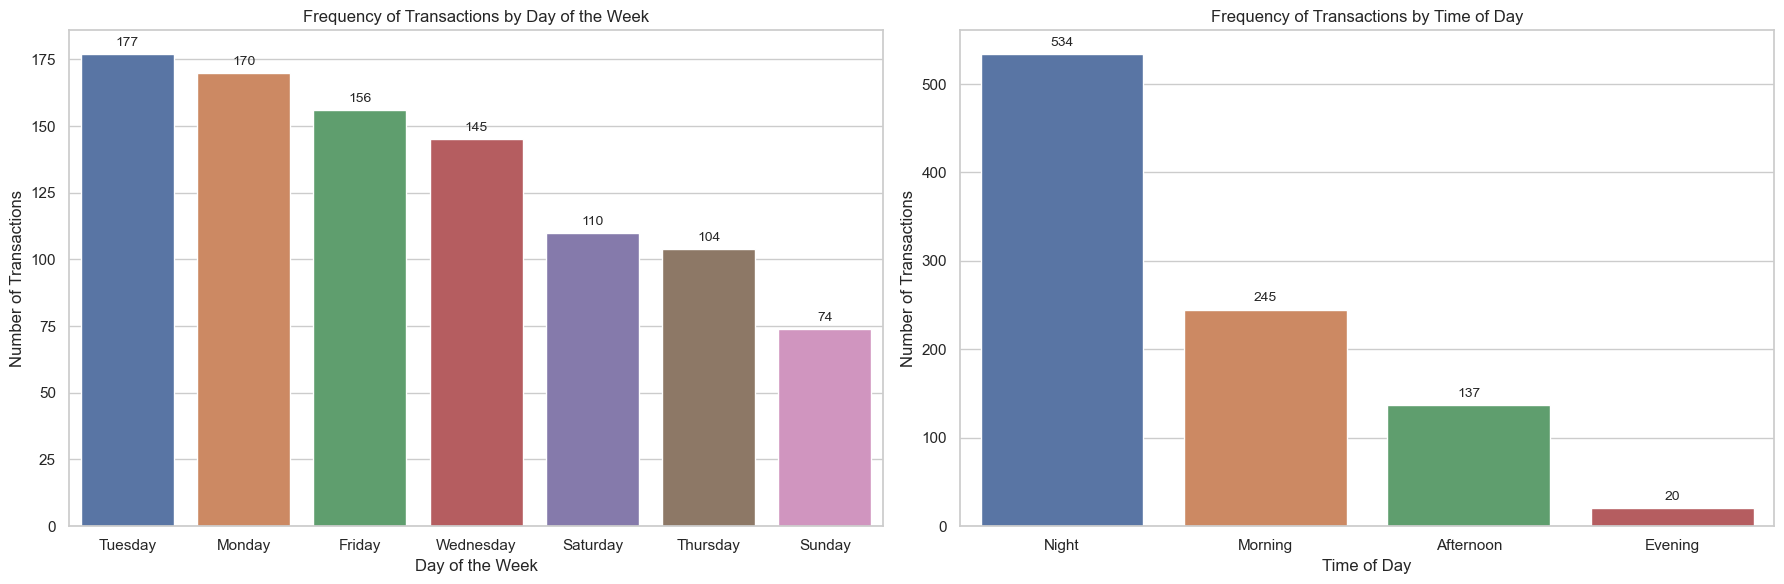

In [84]:
# Prepare the figure layout for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for "day_of_week"
day_of_week_order = data_SGD['day_of_week'].value_counts().index
sns.countplot(data=data_SGD, x='day_of_week', order=day_of_week_order, ax=axes[0])
axes[0].set_title('Frequency of Transactions by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Transactions')

# Adding labels to each bar in "day_of_week" plot
for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Plot for "time_of_day"
time_of_day_order = data_SGD['time_of_day'].value_counts().index
sns.countplot(data=data_SGD, x='time_of_day', order=time_of_day_order, ax=axes[1])
axes[1].set_title('Frequency of Transactions by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Transactions')

# Adding labels to each bar in "time_of_day" plot
for bar in axes[1].patches:
    axes[1].annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


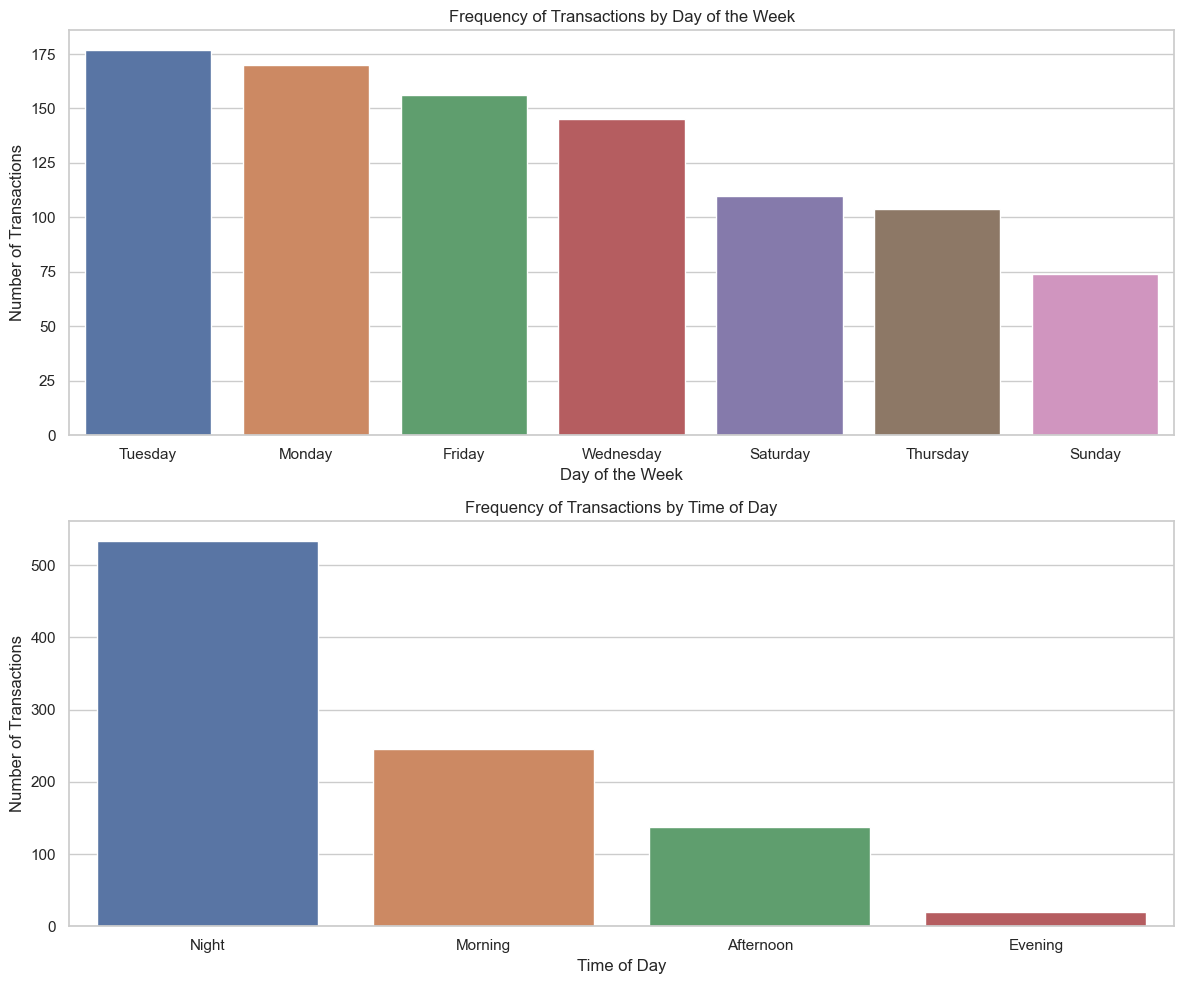

In [83]:
# Set seaborn style
sns.set(style="whitegrid")

# Prepare the figure layout
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for "day_of_week"
sns.countplot(data=data_SGD, x='day_of_week', order=data_SGD['day_of_week'].value_counts().index, ax=axes[0])
axes[0].set_title('Frequency of Transactions by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Transactions')

# Plot for "time_of_day"
sns.countplot(data=data_SGD, x='time_of_day', order=data_SGD['time_of_day'].value_counts().index, ax=axes[1])
axes[1].set_title('Frequency of Transactions by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Transactions')

# Adjust layout
plt.tight_layout()
plt.show()
